In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget


In [71]:
Data_for_VU = [[0,0], [1,0], [2,0], [3,0], [4,1], [5,1], [6,1], [7,1]]
df = pd.DataFrame(Data_for_VU, columns=["tumour size", "malignant"])

Data_for_VU



[[0, 0], [1, 0], [2, 0], [3, 0], [4, 1], [5, 1], [6, 1], [7, 1]]

In [72]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    result = 1/(1+np.exp(-z))
    return result

In [73]:
def calc_cost(w, b, data):
    X = data.drop("malignant", axis=1).values
    Y = data["malignant"].values
    m = len(data)
    y_preds = sigmoid(np.dot(X, w) + b )
    eps = 1e-9
    cost = (-1.0/m) * np.sum(Y*np.log(y_preds+eps) + (1-Y)*np.log(1-y_preds+eps))
  
    return cost



In [74]:
def gradient_descent(w_current, b_current, data, LR):
    X = data.drop("malignant", axis=1).values
    Y = data["malignant"].values
    m = len(data)
    y_preds = sigmoid(np.dot(X, w_current) + b_current )
    w_grad = (1.0/m) * np.dot(X.T, (y_preds - Y))
    b_grad = (1.0/m) * np.sum(y_preds - Y)

    w = w_current - LR*(w_grad) 
    b = b_current - LR*(b_grad) 

    return w, b

In [75]:
w = np.zeros(1,)
j_val_overtime = np.zeros(50)
w_val_overtime = np.zeros(50)
b_val_overtime = np.zeros(50)
b = 0
LR = 0.1
epochs = 5000
for i in range(epochs):
    w,b = gradient_descent(w,b,df,LR)
    if i % 100 == 0:
        j_val_overtime[i//100] = calc_cost(w, b, df)
        w_val_overtime[i//100] = w[0]
        b_val_overtime[i//100] = b


w,b

(array([2.92934491]), np.float64(-10.068748540557637))

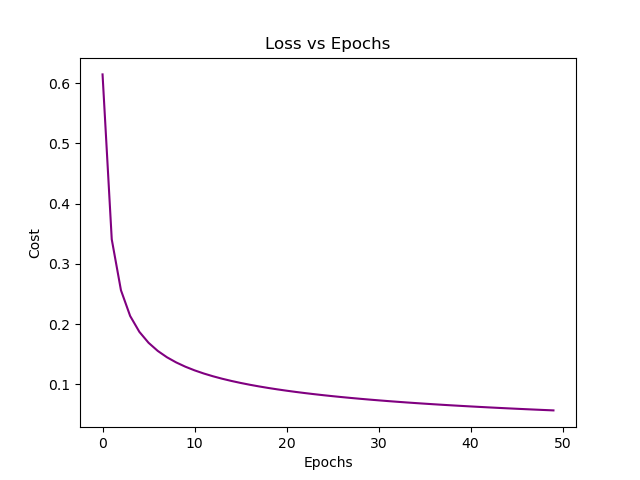

In [76]:
fig, ax = plt.subplots()
ax.plot(range(len(j_val_overtime)), j_val_overtime, color="purple")
ax.set_xlabel("Epochs")
ax.set_ylabel("Cost")
ax.set_title("Loss vs Epochs")
plt.show()


In [ ]:
malignant = df[df["malignant"] == 1]
non_malignant = df[df["malignant"] == 0]
x_vals = np.linspace(0, 7, 5000)
for i in range(0, epochs, 100):
        fig, ax = plt.subplots()
        ax.scatter(non_malignant["tumour size"], non_malignant["malignant"], marker="o", color="blue", label="Non-malignant")
        ax.scatter(malignant["tumour size"], malignant["malignant"], marker="x", color="red", label="Malignant")
        ax.set(xlabel="Tumour size", ylabel="Malignant (0 = No, 1 = Yes)", title="Tumour size vs Malignancy")
        ax.plot()
        
        if w_val_overtime[i] != 0:
                boundary_x = -b_val_overtime[i] / w_val_overtime[i]
                ax.axvline(boundary_x, color="orange", linestyle="--", label="Decision Boundary")

        y_vals = sigmoid( np.dot(x_vals, w_val_overtime[i])+ b_val_overtime[i])
        ax.plot(x_vals, y_vals)
        ax.legend()
        # plt.savefig(f"C:/Users/adity/OneDrive/Desktop/Linear_reg_Scratch/temp images/img_{i}.png")
        plt.close(fig)

In [104]:
w_for_3d = np.linspace(-5, 5, 100)
b_for_3d = np.linspace(-15, 15, 100)
w_for_grid, b_for_grid = np.meshgrid(w_for_3d, b_for_3d)
j_for_3d = np.zeros_like(w_for_grid)
for i in range(w_for_grid.shape[0]):
    for j in range(w_for_grid.shape[1]):
        j_for_3d[i,j] = calc_cost(w_for_grid[i,j], b_for_grid[i,j], df)


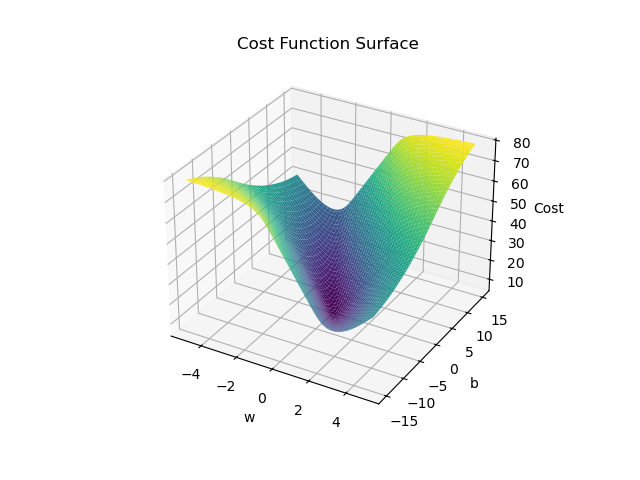

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_for_grid, b_for_grid, j_for_3d, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')
plt.show()

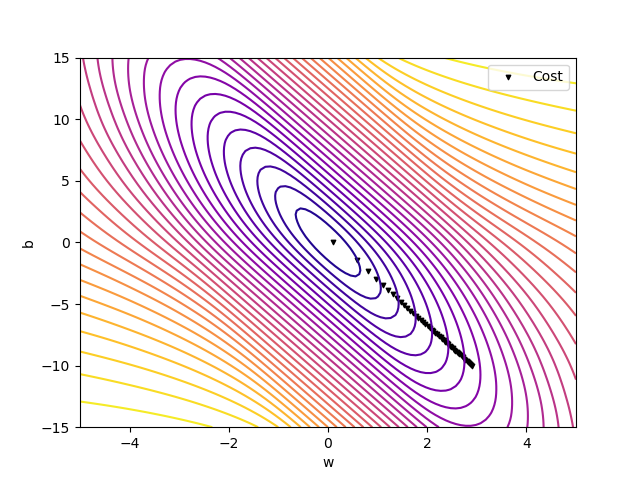

In [106]:
fig, ax = plt.subplots()
contour = ax.contour(w_for_grid, b_for_grid, j_for_3d, levels=30, cmap='plasma')
ax.scatter(w_val_overtime,b_val_overtime , c='black', marker='v', s=10, label="Cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
plt.legend()
plt.show()